# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Somesh Kale </font>

# Introduction

In this Assignment, "House Sales for king county in USA" dataset is used for implementing Linear Regression. This dataset contains several variables, in these variables some are independent variables that are not affected by other variables and 1 dependent variable viz. the target value which affects according to other variables. For linear regression, two linear models are used least-squares and LMS viz. least mean square. Least mean square is implemented with two different types Gradient descent and Stochastic gradient descent viz also known as incremental gradient descent. In gradient descent, the gradient is computed using whole dataset. While in stochastic gradient descent, it is found by iterating and minimizing the error function. It starts improving itself iteration by iteration. Also, in this assignment, comparison of these methods of implementing linear regression is plotted by using libraries like matplotlib and seaborn, yellowbrick showing which models fits the best to the data.

# Data
    
 ### Description
 
 #### Dataset has detailed description of the house sales for King County in USA.It includes homes sold between May 2014 and May 2015. It contains 19 features and one target variable price and id columns with 21613 observations.

    1. ID: Every house has different IDs for uniqueness
    2. Date: Date on which the house was sold
    3. Price: Price at which the house was sold
    4. Bedrooms: Number of Bedrooms in the House
    5. Bathrooms: Number of Bathrooms in the House
    6. Sqft_Living: square footage of the house
    7. Sqft_Lot: square footage of the lot
    8. Floors: Total floors in the house
    9. Waterfront: House which has a waterfront view.
    10. View: Has been viewed
    11. Condition: How good the condition is based on all factors
    12. Grade: overall grade given to the House
    13. Sqft_Above: square footage of house apart from basement
    14. Sqft_Basement: square footage of the basement
    15. Yr_Built: Built Year
    16. Yr_Renovated: Year when house was renovated
    17. Zipcode: Zip
    18. Lat: Latitude coordinate
    19. Long: Longitude coordinate
    20. Sqft_Living15: sqft_living affected due to renovations
    21. Sqft_Lot15: sqft_lot affected due to renovations
    
    Total Observations : 21613
    Total features : 21
    
    Source : https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df=pd.read_csv("kc_house_data.csv")

### Plots for understanding & Preliminary Observation

#### Scatter plot is used for visualizing (x,y) which helps in indentifying co-relation between x & y and also detects the outliers in the plot

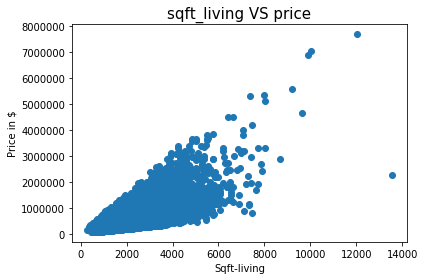

In [2]:
plt.scatter(df['sqft_living'],df['price'])
plt.title('sqft_living VS price',fontsize=15)
plt.ylabel('Price in $')
plt.xlabel('Sqft-living')
plt.show()

price VS sqft_living : As sqft_living of the house increases it affects the price too, resulting in the increase price. While buying house, people are focusing on the sqft_living range between 0 to 6000 which is costing them around 1M to 4M dollars. 

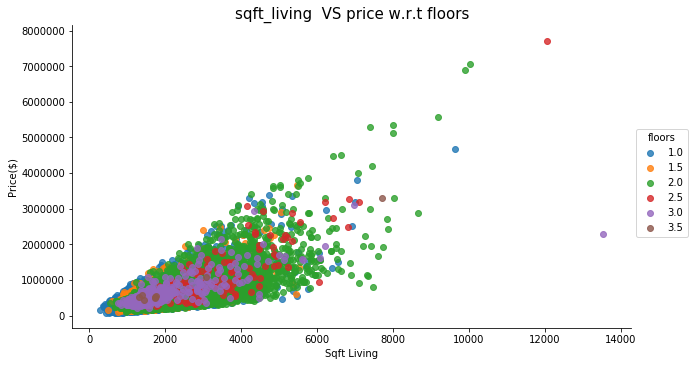

In [3]:
plt.figure(figsize = (10,5))
sb.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df, hue="floors", fit_reg=False)
plt.title("sqft_living  VS price w.r.t floors", fontsize=15)
plt.xlabel("Sqft Living")
plt.ylabel("Price($)")
plt.show()

sqft_living  VS price w.r.t floors : In this plot, observations are scattered according to the floors. Most of the houses sold are of 2 and 3 floors, people are likely to select such house. Also, houses with 2 floors have higher price than 3 floors houses in some observations, here other variables like year built, condition, view, waterfront view might be affecting the price.

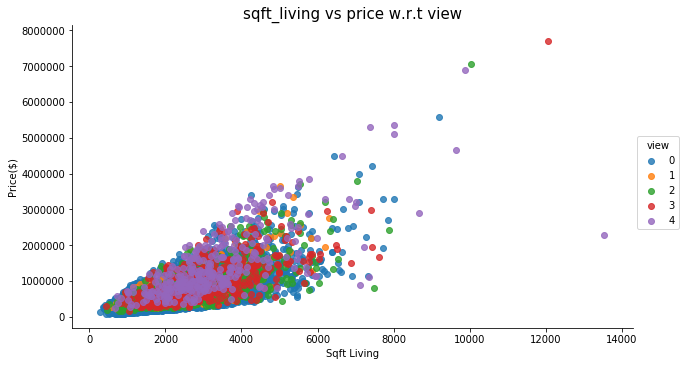

In [4]:
plt.figure(figsize = (10,5))
sb.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df, hue="view", fit_reg=False)
plt.title("sqft_living vs price w.r.t view", fontsize=15)
plt.xlabel("Sqft Living")
plt.ylabel("Price($)")
plt.show()

sqft_living vs price w.r.t view : In this plot, observations are scattered based on the view of that particular house. In some observations, price for 0 view house is increasing as sqft_living increases viz. equal to the price of the houses with 4 view.

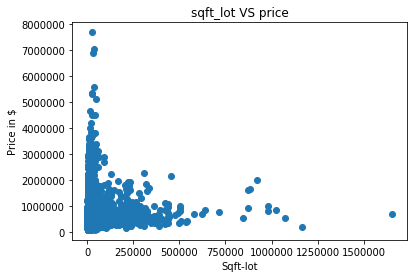

In [5]:
plt.scatter(df['sqft_lot'],df['price'])
plt.title('sqft_lot VS price')
plt.ylabel('Price in $')
plt.xlabel('Sqft-lot')
plt.show()

price VS sqft_lot : Changes in sqft_lot is not affecting the price much. As most of the observations are between (0-250000) and the price is increasing between this area, another variable along with sqft_lot might be resulting in the price change.

Text(0.5,6.8,'Sqft-basement')

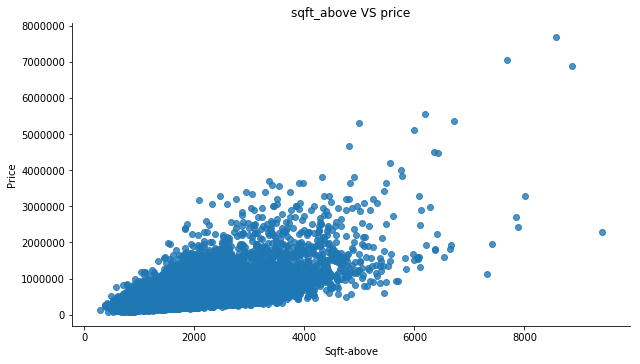

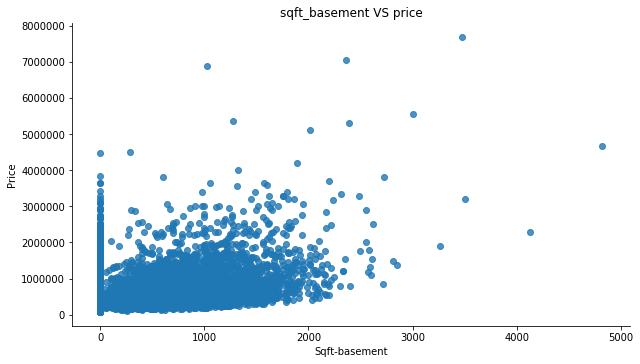

In [6]:

sb.lmplot(x="sqft_above", y="price", aspect=1.8,
                    data=df, fit_reg=False)
plt.title('sqft_above VS price')
plt.ylabel('Price')
plt.xlabel('Sqft-above')


sb.lmplot(x="sqft_basement", y="price", aspect=1.8,
                    data=df, fit_reg=False)
plt.title('sqft_basement VS price')
plt.ylabel('Price')
plt.xlabel('Sqft-basement')


sqft_above VS price : As sqft_above of the house increases it affects the price too, resulting in the increase price. sqft_above is the sqft excluding basement

sqft_basement VS price : Observations with 0 sqft-basement also have higher price compairing to the observations with 0 to 2000 sqft_basement. Observations with 0 sqft-basement might be getting higher price due to other variables. 

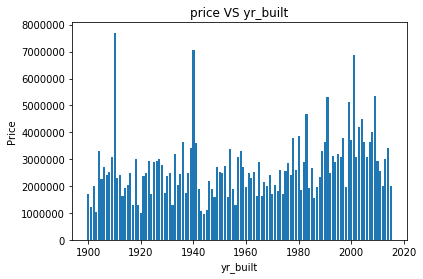

In [7]:
plt.bar(df['yr_built'],df['price'])
plt.title('price VS yr_built')
plt.ylabel('Price')
plt.xlabel('yr_built')
plt.show()

price VS yr_built : The properties that were built in the year 1910, 1940 and 2000 have higher prices. Year built is not the only factor here that is affecting the price, along with yr_built variable other variables like year renovated, sqft, bedrooms or bathrooms might be affecting the price.

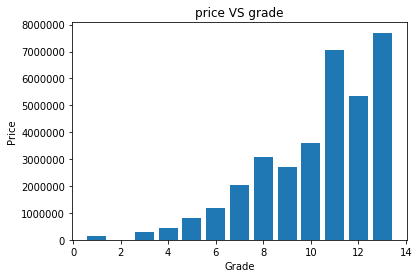

In [8]:
plt.bar(df['grade'],df['price'])
plt.title('price VS grade')
plt.ylabel('Price')
plt.xlabel('Grade')
plt.show()

price VS grade : In the dataset, houses are rated or given a grade based on the overall variables. Higher the grade, higher will be the price of the house.

# Preprocessing of the Data

#### > Checking for missing values in the Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


There is no missing value in the dataset. If the missing value or nan was present, replacing the missing value with the mean of that particular column / variable was the best option. 

#### > Removing the unrealted data (ID,Date) which will not affect the target variable i.e price 

In [10]:
df=df.drop(['id','date'],axis=1)

df.drop will drop the columns/features i.e 'id','date' as it is irrelevant data for predicting the price.

# Method

### Linear Model
In the dataset used, price is defined by different factors like sqft_living, number of bedrooms/bathrooms, year-built, condition, number of views etc. using large number of these observations this machine learning model learns how target variable i.e price is affected by other factors and how changing one feature will affect the price or not. This is known as learning and the samples which are used for training are known as training samples. Different learning types are Batch learning and Online learning.



$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

here the features x are computed with the weights w
here f(x;w) generates y values for the features used for training i.e it predicts the value for price after training, and this value is closer to target output i.e price. For getting the difference between the predicted value and the actual or real value cost function is calculated.

Cost function:
$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

here, difference between the predicted and real value is calculated. Trying to reduce this cost function will get predicted values closer to real values.

### Super Classs Definition

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

### Least Squares

Features i.e 'sqft_lot', 'sqft_above', 'price', 'sqft_living', 'bedrooms', 'grade', 'yr_built', 'yr_renovated', 'views' are collected in matrix X
$$
\begin{align}
X &= \begin{bmatrix}
    x_{10} & x_{11} & x_{12} & \dots  & x_{1D} \\
    x_{20} & x_{21} & x_{22} & \dots  & x_{2D} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{N1} & x_{N2} & \dots  & x_{ND}
\end{bmatrix}
\end{align}
$$

weights are collected in w
$$
\\
\begin{align}
w &= [w_0, w_1, \cdots, w_D]^\top \\
\\
\end{align}
$$
target variables i.e price is collected in T
$$
\\
\begin{align}
T &= [T_1, T_2, \cdots, T_N]^\top \\ 
\\
\end{align}
$$
Here, least squares use all the available data for training and the same weights are applied on the whole data.

In [12]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        x=self.add_ones(X)
        self.w = np.linalg.solve(x.T @ x, x.T @ T)
        
    # apply the learned model to data X
    def use(self, X):
        x=self.add_ones(X)
        Y = x@self.w
        return Y
        
        ## TODO: replace this with your codes

Above code is for linear regression with least squares.
In function train(X,T), 'X' is the feature values of Xtrain and 'T' is the target value of Ttrain. Before computation, a bias is add in the features because if the values of the features are 0 then it will compute the output equals to 0 even if the weights are added and it will predict the same output again and again. 'w' is weights which are added to the features and it is computed by

$$ np.linalg.solve(x.T @ x, x.T @ T) $$ 

here numpy implements a function which solves the linear equation. x.T provides the transpose of weights before multiplying with the matrix. After applying the least square method on Xtrain and Ttrain, weights are calculated and these weights are applied on Xtest viz. the unseen data. Bias is added on the unseen data also. The predicted value is generated.

### Least Mean Squares
As in least squares, all the available data is used for training. For large dataset 'ls' can be computationally costly. But in least mean squares, the data is introduced one by one and the weights or parameters are updated at every step and new estimation is generated and these steps are repeated for the n number of observations in the dataset. It is also knows as squential or online learning.
$$ w(k+1)=w(k)−α∇Ek $$

Ek is the error viz. the difference of previous data and the actual value and learning rate is also computed at every step denoted as 'α'. This is stochastic gradient descent.

Update Rule:
 $$w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k $$

In [13]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.shape)<=2:
            x=np.insert(x,0,1)
            x=x.reshape(-1,1)
        if self.w is None:
            self.w=np.zeros((x.shape[0],1))
        y = x.T@self.w
        self.w = self.w - (self.alpha*(y-t)*x)
         ## TODO: replace this with your codes
            
    # apply the current model to data X
    def use(self, X):
        X=self.add_ones(X).T
        y = X.T@self.w
        return y
        ## TODO: replace this with your codes
        
        

In the above code, in train(X,T) function 'for' loop is used for iterating through train step function for n number of observations. In train step function, first the function will check for the shape of the feature if it is not equal to 2, a bias is added to that feature. we have to check for w is none or not because it is iterating through n number of observations. if it is none then the weights are intialised as zeros. After the weights are intialised, those weights are computed with the particular feature and the target value is predicted. The error or cost function will give difference between the actual and predicted value then the update rule is applied with the learning rate on the error function and it is substracted with the previous value of w.

Iterating on the number of observations will keep on updating the weights every single step trying to best fit on the model. This trained weights are computed with the unseen data viz. 20% of the data from the dataset and it will predict the target value.

### Usage Examples

In [14]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

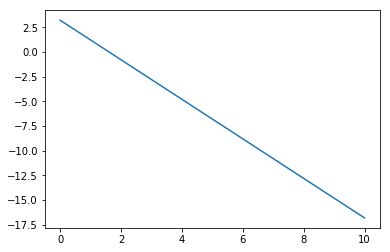

In [15]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))


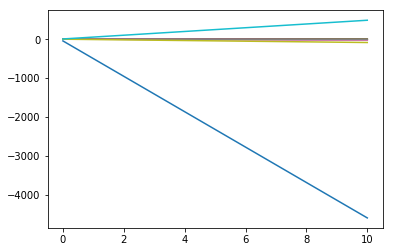

In [16]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

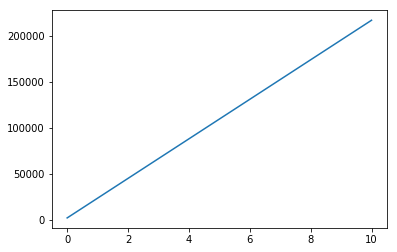

In [17]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [18]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments

#### Description, Codes and Visualization of Results

Applying the least squares and least mean squares on the House Sales dataset.

In [19]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std
df_n=normalize(df)


As, the dataset includes various range of values consider two columns sqft_living and number of views, number of bedrooms etc. the values in sqft_living column is in range 1,000 to 40,000 and the views, bedrooms columns are in range 1 to 7. Here, normalizations should be applied for changing the values in the dataset to common scale without distorting the ranges of values.
Normalization is also a step of preprocessing the data.

In [20]:
X=df_n.iloc[:,1:]
T=df_n.iloc[:,0].as_matrix()

Applying the normalize function on features and target variable.

In [21]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

Here, partition function will partition the whole dataset into 80 - 20 split. i.e 80% of the data is used for training the model and 20% of the data is used for applying the learned techniques from the 80% data on it and predicting the output.

In [22]:
Xlst, Tlst=partition(pd.DataFrame(X),pd.DataFrame(T))

In [23]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]


Iterating through Xlst, the 80% of Xlst values is stored in Xtrain which will be used furthur for training and 20% of Xlst is stored in Xtest where the learned model will be used.

Iterating through Tlst, the 80% of Tlst values is stored in Ttrain which will be used furthur for training and 20% of Tlst is stored in Ttest which is the actual value and can be used for comparison of actual value 'Ttest' and the predicted valued.

#### Least squares on Data:

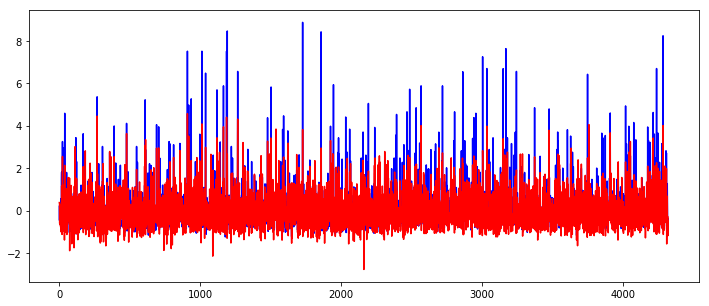

In [24]:
ls = LinearRegress()

ls.train(Xtrain, Ttrain)
yls=ls.use(Xtest)
plt.figure(figsize=(12,5))
plt.plot(Ttest,color='blue')
plt.plot(yls,color="red")



Xtrain and Ttrain is passed to least squares train function. After the model is trained, it is applied on the unseen 20% data and the predicted value is stored in yls variable. 

In the plot, red values correspond to predicted values and blue values correspond to actual or real values. The predicted values are closer to the actual values.

In [25]:
comparison=pd.DataFrame({'Actual':Ttest.flatten(),'Predicted':yls.flatten()})
comparison.head(25)

,Actual,Predicted
0,-0.436056,0.377952
1,0.231015,0.377952
2,-0.436683,-0.607914
3,-0.545010,-0.310358
4,-0.066974,0.089770
5,0.163191,0.291613
6,-0.381579,-0.406495
7,-0.479638,-0.688611
8,-0.272625,-0.134285
9,-0.694822,-0.782522


'pd.Dataframe' with create a table of predicted and actual values.
Above table shows first few of the predicted values and the actual values

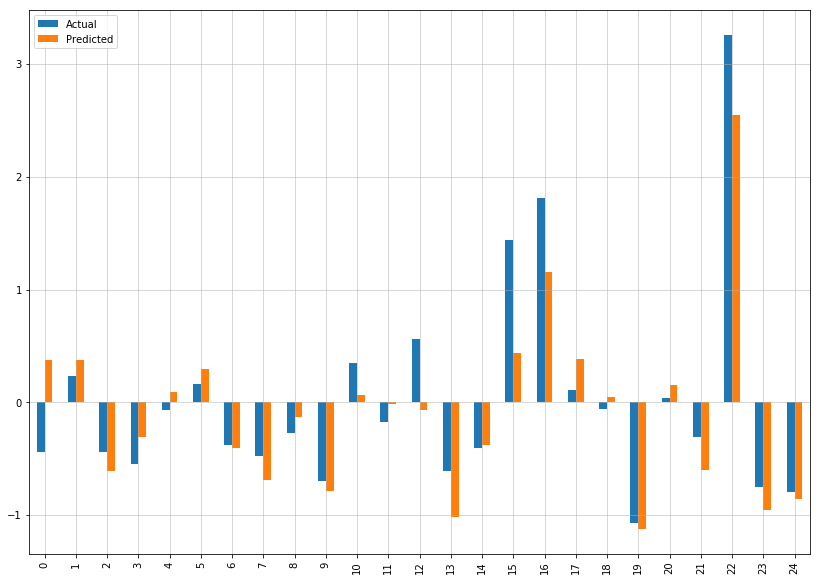

In [26]:
df1 = comparison.head(25)
df1.plot(kind='bar',figsize=(14,10))
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.show()

Using first few samples from the table, above plot shows the comparison of actual and predicted values. Blue bars represents Actual values and Orange bars represents predicted values.


#### Least Mean squares on Data :

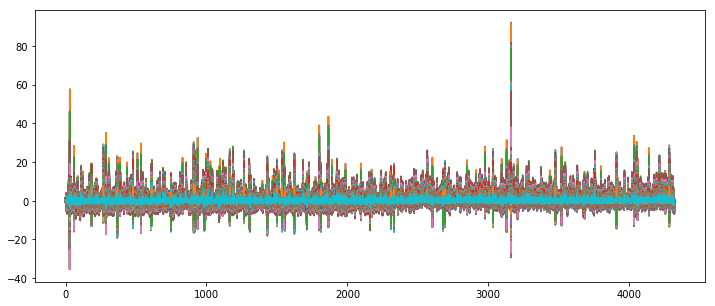

In [27]:
lms=LMS(0.01)
y=np.array([])
plt.figure(figsize=(12,5))
for i in range(Xtrain.shape[0]):
    lms.train_step(Xtrain[i],Ttrain[i])
    y=lms.use(Xtest)
    plt.plot(y)

An empty 'y' numpy array is created, for every observation in the dataset lms train function is training feature and target variable with the intialised weights and at every step the weights are getting updated according to the the cost function. The predicted value is generated and updated at every step. 

In the above plot, the 'y' values viz. predicted values are getting updated on every step and the model is trying to best fit the solution based on minimizing the cost function.

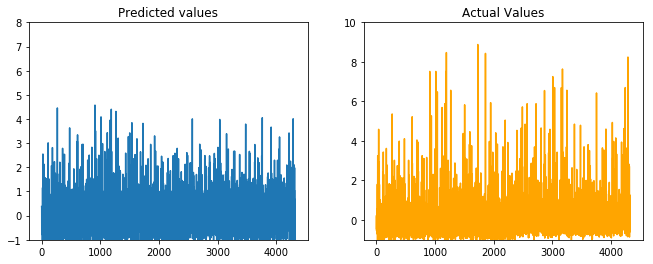

In [28]:
lmsnew=LinearRegress()
lmsnew.train(Xtrain, Ttrain)
plt.figure(figsize=(11,4))
plt.subplot(121)
lms_all=lmsnew.use(Xtest)
plt.plot(lms_all)
plt.ylim(-1,8)
plt.title("Predicted values")

plt.subplot(122)
plt.plot(Ttest,color="orange")
plt.ylim(-1,10)
plt.title("Actual Values")
plt.show()

Using lms.train function for predicting the values, this function will iterate through train_step function and will generate final prediction after minimizing the cost function. Above plot shows actual values and lms predicted values.   

In [29]:
comparisonlms=pd.DataFrame({'Actual':Ttest.flatten(),'Predicted':y.flatten()})
comparisonlms.head(25)

,Actual,Predicted
0,-0.436056,0.523234
1,0.231015,0.523234
2,-0.436683,-0.604517
3,-0.545010,-0.432774
4,-0.066974,0.380391
5,0.163191,0.590418
6,-0.381579,-0.811482
7,-0.479638,-0.814765
8,-0.272625,-0.008955
9,-0.694822,-0.868834


Above table shows first few predicted values from least mean squares method and the actual values.

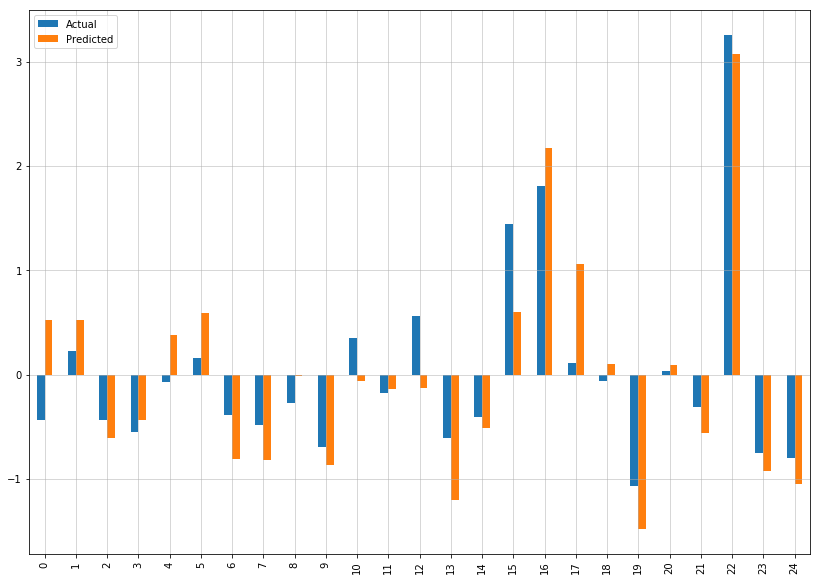

In [30]:
df2 = comparisonlms.head(25)
df2.plot(kind='bar',figsize=(14,10))
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.show()

Using first few samples from the table, above plot shows the comparison of actual and predicted values.

#### Analysis / Comparison of Algorithms

Text(0.5,1,'Least Mean Squares Predicted values')

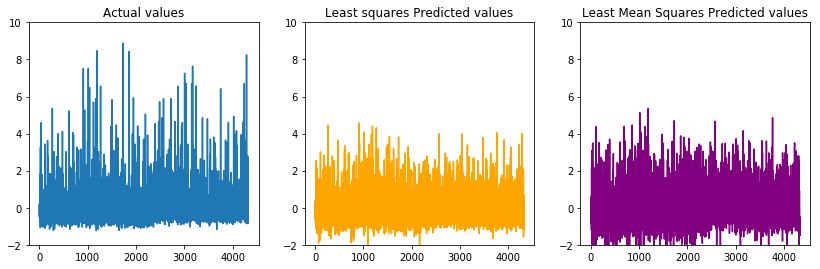

In [31]:
plt.figure(figsize=(14,9))

grid=plt.GridSpec(2,3,wspace=0.2,hspace=0.2)
plt.subplot(grid[0,0])
plt.plot(Ttest)
plt.ylim(-2,10)
plt.title("Actual values")

plt.subplot(grid[0,1])
plt.ylim(-2,10)
plt.plot(yls,color="orange")
plt.title("Least squares Predicted values")

plt.subplot(grid[0,2])
plt.ylim(-2,10)
plt.plot(y,color="purple")
plt.title("Least Mean Squares Predicted values")



first plot shows the actual price values, second plot shows the values predicted by least squares method using the trained model which are closer to the actual values and thrid plot shows Least Mean Squares predicted values. 

In least square, the whole dataset is passed for training with the weights whereas the least mean squares train every single row from Xtrain, Ttrain one by one updating the weights inorder to fit the model according to the actual values. While best fitting the model, the weights are trying to improve the cost function i.e lowering the cost function by back propogating and updating weights and running train again through the data.

> * In least squares, all the data samples are computed in training which provides less oscillations and less noisy.

> 2. Whereas in least mean squares, the data is passed in the train function one by one which keeps on updating the weights parameter.

> 3. In least squares, Increase in speed of processing of all training samples.

> 4. In least mean squares, It is computationally fast as the data is trained one by one.

> 5. Least squares method is providing stable convergence.

> 6. But due to stable convergence or stable error, least squares can lead to local minima and it will not get updated as there are no train steps like least mean squares.

> 7. Whereas in least mean squares, it can get out of the local minima as it keeps on updating the weights and as it is functioning the whole dataset in steps.

> 8. Least Mean square method is noisy


# Conclusions

Before performing computation on the dataset it is better to perform preprocessing on the dataset. In preprocessing stage, checking for a null value as the null value might affect the predicted value. For removing null values, calculating the mean of a certain column where null value is found is an option. Also, it is best to aviod or drop the feature which is not contributing for calculating the target value. Also, normalization of the dataset is required because there are different features in the dataset with various range which might affect while predicting the values. Normalizing the data in the common scale without distorting the ranges of values. Splitting function of the dataset in Xtrain, Ttrain and Xtest, Ttest variables where 80% and 20% of the data is split which can be furthur used for training and applying the trained model on unseen data. In visualization, seaborn library have various functions to plot a certain variable in different ways. for example, seaborn's lmplot function helps to plot the x and y coordinates with respect to other varible using hue parameter, it also have various parameters like aspect which can adjust the aspect ratio of the plot. Matplotlib grid, subplot function which helps to plot 3 subplots in same figure which is helpful for comparison of plots. 

# References

[1] Harlfoxem. “House Sales in King County, USA.” Kaggle, 25 Aug. 2016, 
    https://www.kaggle.com/harlfoxem/housesalesprediction.

[2] Lee, Prof. Minwoo Jake. “Linear Model.” 
 https://nbviewer.jupyter.org/format/slides/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/slides/Linear%20Model.ipynb#/

[3] Lee, Prof. Minwoo Jake. “Forest Fire.”
    https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipyn

[4] “Residuals Plot.” Residuals Plot - Yellowbrick v1.0.post1 Documentation, 
    https://www.scikit-yb.org/en/latest/api/regressor/residuals.html.



## Extra Credit

#### what is the most and least significant features for your data

#### Using pariplot

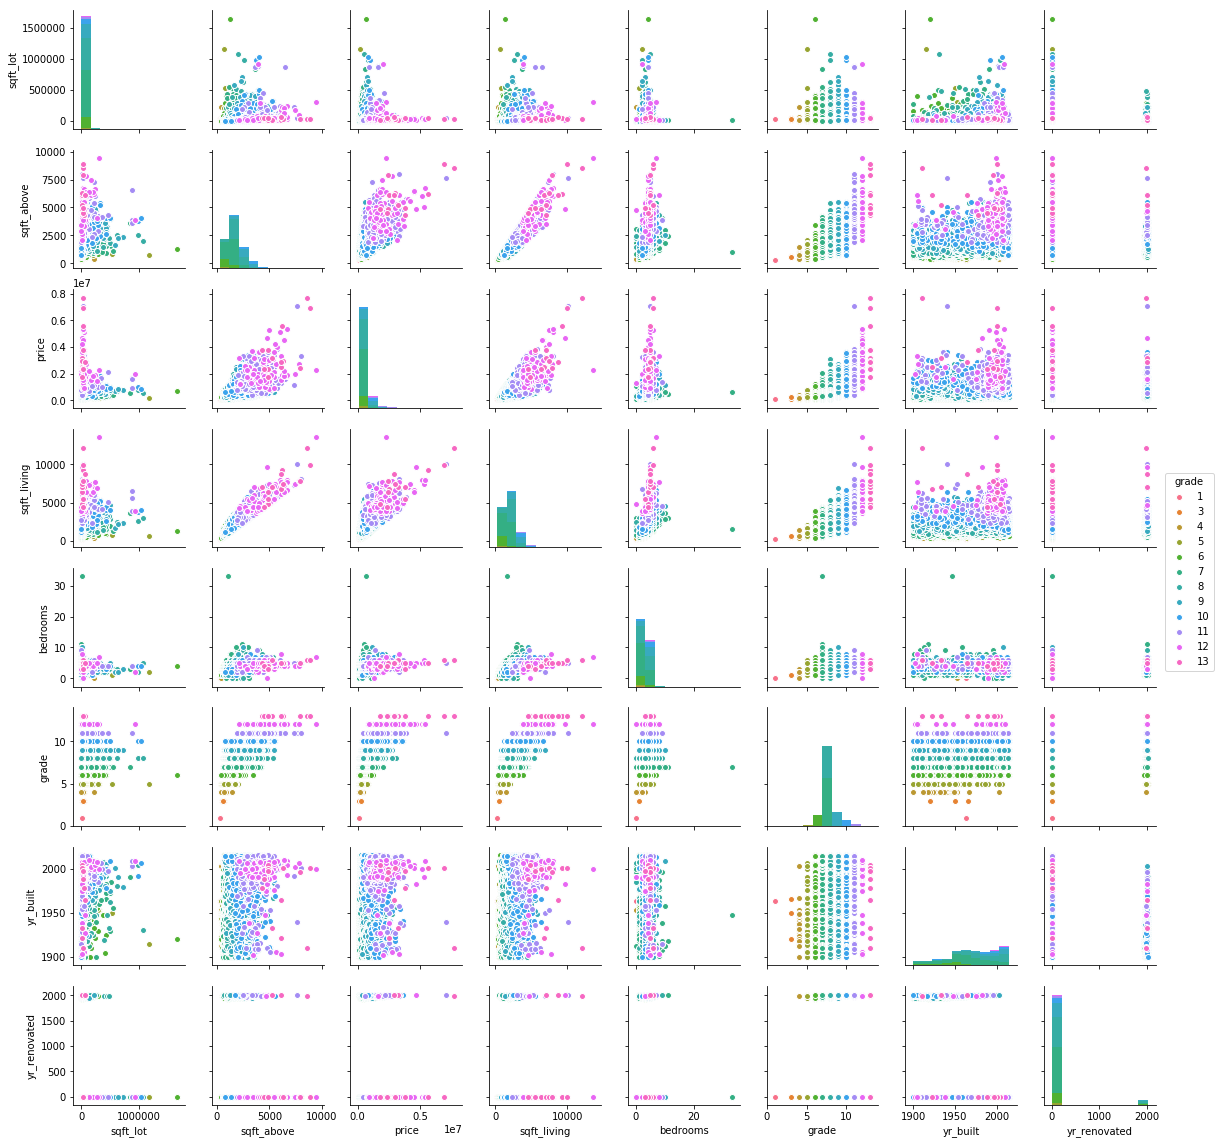

In [32]:
plt.figure(figsize=(8,6))
sb.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']], hue='grade', size=2)

Above figure shows different plots for features. It shows whether the features are affecting other features or not depending on correlation (different color represents grades)

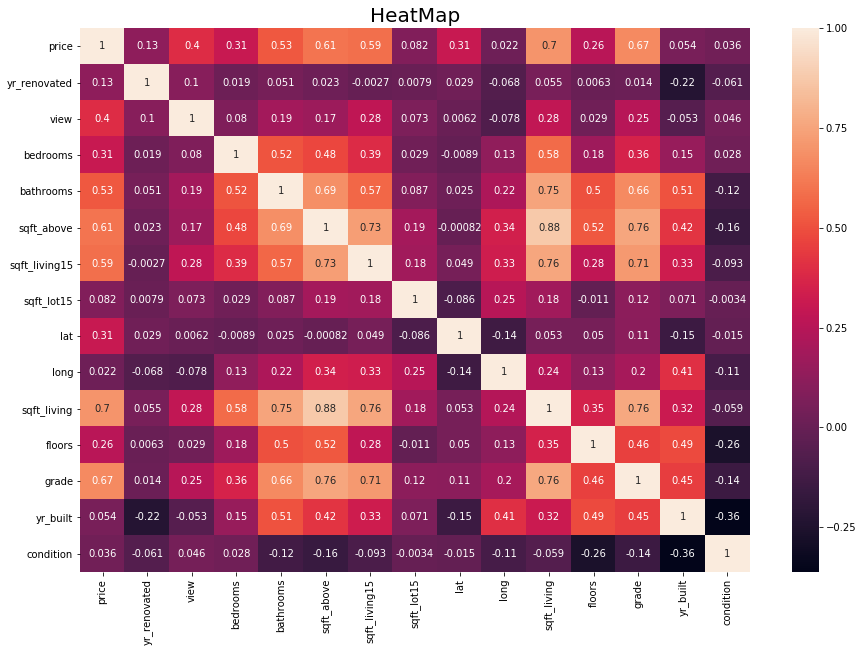

In [33]:
plt.figure(figsize=(15,10))
columns =['price','yr_renovated','view','bedrooms','bathrooms','sqft_above','sqft_living15','sqft_lot15','lat','long','sqft_living','floors','grade','yr_built','condition']
sb.heatmap(df[columns].corr(),annot=True)
plt.title("HeatMap",fontsize=20)
plt.show()


above heatmap shows correlation between x & y. If the correlation is positive, changes to x will affect y and if the correlation is negative, changes to x will not affect y. For ex. sqft_living is linear fit to the target variable i.e price. So, if sqft_living increases the price increases too.

The most significant features in the dataset from the above heatmap is sqft_living, sqft_above, grade as increase in these features will contribute more for increase or decrease in price as it is linearly fit.

The least significant features are condition and long, from the above heatmap these features have less coorelation with Target variable price. These features are contributing less among other features for increase or decrease in the price.

#### what are the consequences if you remove those features from the model? (Show your work!) & Residual Plots

>  Removing least significant features : condition & long

>  Residual plots

In [34]:
df_extra=df.drop(['condition','long'],axis=1)

df.drop will remove the features 'condition' and 'long' which are irrelevent for predicting the price.

In [35]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std
df_n_extra=normalize(df_extra)

X_extra=df_n_extra.iloc[:,1:]
T_extra=df_n_extra.iloc[:,0].as_matrix()

def partition(X_extra, T_extra, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X_extra.index)
    
    # the number of samples 
    N = X_extra.shape[0]
    
    Xs_extra = []
    Ts_extra = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs_extra.append(X_extra.iloc[i:, :])
            Ts_extra.append(T_extra.iloc[i:, :])
        else:
            Xs_extra.append(X_extra.iloc[i:i+nrows, :])
            Ts_extra.append(T_extra.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs_extra, Ts_extra

Xlst_extra, Tlst_extra=partition(pd.DataFrame(X_extra),pd.DataFrame(T_extra))

Here, normalize will bring the range of the data into common scale and partition function will partition the whole dataset into 80 - 20 split. i.e 80% of the data is used for training the model and 20% of the data is used for applying the learned techniques from the 80% data on it and predicting the output.

In [36]:
Xtrain_extra, Xtest_extra = [xx.as_matrix() for xx in Xlst_extra]
Ttrain_extra, Ttest_extra = [tt.as_matrix() for tt in Tlst_extra]

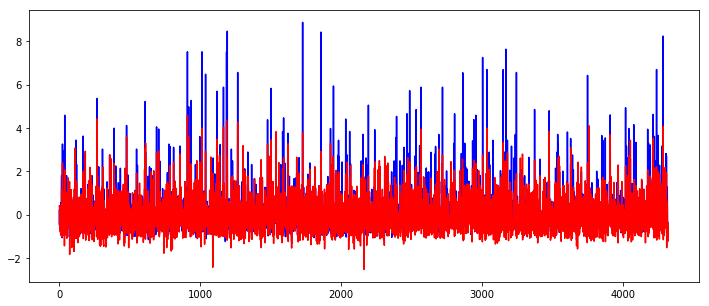

In [37]:
ls_extra = LinearRegress()

ls_extra.train(Xtrain_extra, Ttrain_extra)
yls_extra=ls_extra.use(Xtest_extra)
plt.figure(figsize=(12,5))
plt.plot(Ttest_extra,color='blue')
plt.plot(yls_extra,color="red")


Rmse value after removing least significant feature

In [38]:
rmse=np.sqrt(np.sum((yls_extra-Ttest_extra)**2)/X_extra.shape[0])
print("RMSE : ",rmse)

RMSE :  0.256894570325489


Rmse value considering all features in the dataset

In [39]:
rmse=np.sqrt(np.sum((yls-Ttest)**2)/X_extra.shape[0])
print("RMSE : ",rmse)

RMSE :  0.2532909147374239


After removing the least significant features like condition and long from the dataset, the rmse value does not change alot compairing to the rmse value for whole dataset i.e removing least significant features will not affect the predicted value much.

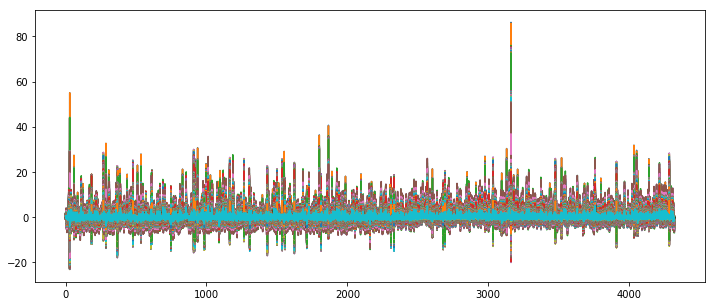

In [40]:
lms_extra=LMS(0.01)
plt.figure(figsize=(12,5))
for i in range(Xtrain_extra.shape[0]):
    lms_extra.train_step(Xtrain_extra[i],Ttrain_extra[i])
    y=lms_extra.use(Xtest_extra)
    plt.plot(y)

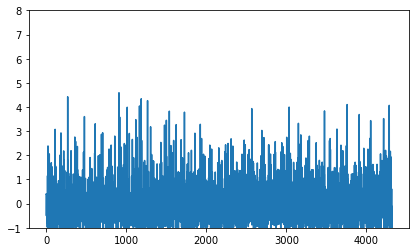

In [41]:
lmsnew_extra=LinearRegress()
lmsnew_extra.train(Xtrain_extra, Ttrain_extra)
plt.figure(figsize=(15,4))
plt.subplot(121)
lms_y_extra=lmsnew_extra.use(Xtest_extra)
plt.plot(lms_y_extra)
plt.ylim(-1,8)
plt.show()

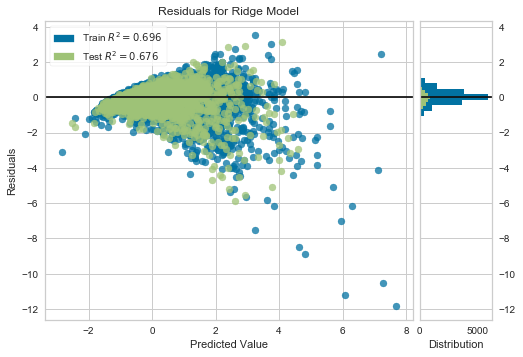

In [42]:

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(Xtrain_extra, Ttrain_extra)
visualizer.score(Xtest_extra, Ttest_extra)
visualizer.poof() 


Here, Residuals plot is showing the difference between the observed value of the target variable and the predicted value. In above plot, as the data is dispered around the horizontal axis so linear model is more appropriate and is performing well. Train $R^2$ is 0.696 and Test $R^2$ is 0.676, it does not change alot means removing the least features will not contribute much in the increase or decrease of the price or predicted value. 

>  Removing most significant features : sqft_living, grade & sqft_above

>  Residual plots

In [43]:
df_extra=df.drop(['sqft_living','sqft_above','grade'],axis=1)

In [44]:
def normalize(X):
    mu = X.mean() 
    std = X.std()
    return (X - mu) / std
df_n_extra=normalize(df_extra)

X_extra=df_n_extra.iloc[:,1:]
T_extra=df_n_extra.iloc[:,0].as_matrix()

def partition(X_extra, T_extra, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X_extra.index)
    
    # the number of samples 
    N = X_extra.shape[0]
    
    Xs_extra = []
    Ts_extra = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs_extra.append(X_extra.iloc[i:, :])
            Ts_extra.append(T_extra.iloc[i:, :])
        else:
            Xs_extra.append(X_extra.iloc[i:i+nrows, :])
            Ts_extra.append(T_extra.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs_extra, Ts_extra

Xlst_extra, Tlst_extra=partition(pd.DataFrame(X_extra),pd.DataFrame(T_extra))

Here, normalize will bring the range of the data into common scale and partition function will partition the whole dataset into 80 - 20 split. i.e 80% of the data is used for training the model and 20% of the data is used for applying the learned techniques from the 80% data on it and predicting the output.

In [45]:
Xtrain_extra, Xtest_extra = [xx.as_matrix() for xx in Xlst_extra]
Ttrain_extra, Ttest_extra = [tt.as_matrix() for tt in Tlst_extra]

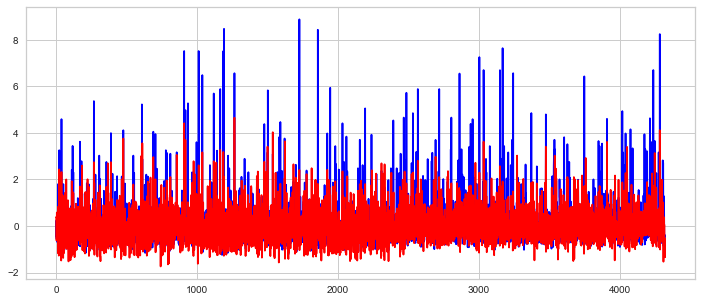

In [46]:
ls_extra = LinearRegress()

ls_extra.train(Xtrain_extra, Ttrain_extra)
yls_extra=ls_extra.use(Xtest_extra)
plt.figure(figsize=(12,5))
plt.plot(Ttest_extra,color='blue')
plt.plot(yls_extra,color="red")


Rmse value after removing most significant feature

In [47]:
rmse=np.sqrt(np.sum((yls_extra-Ttest_extra)**2)/X_extra.shape[0])
print("RMSE : ",rmse)

RMSE :  0.30278302477583224


Rmse value considering all features in the dataset

In [48]:
rmse=np.sqrt(np.sum((yls-Ttest)**2)/X_extra.shape[0])
print("RMSE : ",rmse)

RMSE :  0.2532909147374239


After removing the most significant features like sqft_living, grade and sqft_above from the dataset, the rmse value increases compairing to the rmse value for whole dataset. 

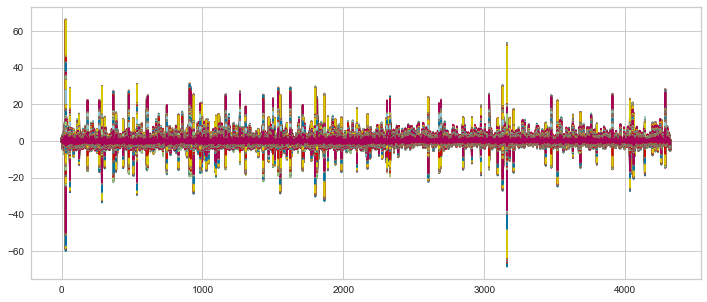

In [49]:
lms_extra=LMS(0.01)
plt.figure(figsize=(12,5))
for i in range(Xtrain_extra.shape[0]):
    lms_extra.train_step(Xtrain_extra[i],Ttrain_extra[i])
    y=lms_extra.use(Xtest_extra)
    plt.plot(y)

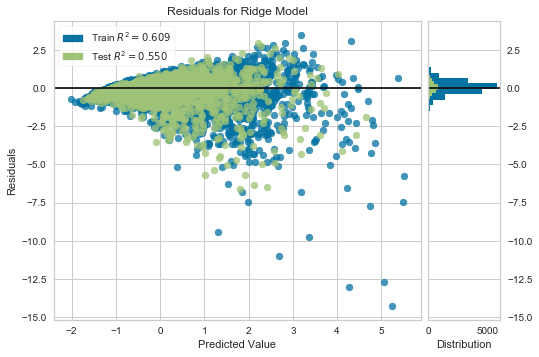

In [50]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(Xtrain_extra, Ttrain_extra)  # Fit the training data to the visualizer
visualizer.score(Xtest_extra, Ttest_extra)  # Evaluate the model on the test data
visualizer.poof() 

Here, Residuals plot is showing the difference between the observed value of the target variable and the predicted value. In above plot, as the data is dispered around the horizontal axis so linear model is more appropriate and is performing well. Train $R^2$ is 0.609 and Test $R^2$ is 0.550, it changed alot after removing the most significant features.